In [3]:
import os
import sys
import json
import math
from tweepy import Cursor
import tweepy
from tweepy import OAuthHandler
import datetime
import jsonpickle
import time
import numpy as np
from collections import Counter
from random import sample
import pandas as pd
from datetime import datetime
import numpy
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
#Variables that contains the user credentials to access Twitter API
consumer_key = "lc2ot5qCQ7S3hZ081vYnnR41n"
consumer_secret = "fdC2OwgYZPqOuem8wLgvuZZ3YSWmwKeffYf88rEpRyEyH4jeBy"
access_token = "448597226-MKZeTehna3KIQ6KDR9ZkDV8vkUJno6WZBwFaNMNo"
access_token_secret = "7U1xwyWIC41JBwkDoLkN7NxgAzcFVKJz4EatqBGnGvMOL"


auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, wait_on_rate_limit=True)



In [5]:
screen_name = "CadburyUK"

def UserStatuses(): #Extract user timeline
    fName = "{}.json".format(screen_name)
    with open(fName, 'w') as f:
        for tweet in tweepy.Cursor(api.user_timeline, screen_name).items():
                f.write(jsonpickle.encode(tweet._json, unpicklable=False) + '\n')
                #print(tweet.text + '\t' + str(tweet.created_at))
        print("\n")
        
UserStatuses()

In [6]:
# load data of tweets mentioning cadbury

# create an empty list to store our tweets in
data_cadbury = []

# append each line of the data to our tweets list using the json module
for line in open('CadburyUK.json'):
    try:
        data_cadbury.append(json.loads(line))
    except:
        pass

In [7]:
# saving the entire tweets in a CSV file

texts = [ T['text'] for T in data_cadbury if 'text' in T ]

# convert to list

tweets = []
for T in data_cadbury:
    if 'text' in T:
        tweets.append(T)

# convert to dataframe

times = [T['created_at'] for T in tweets]
tweet = [T['text'] for T in tweets]
screen_names = [T['user']['screen_name'] for T in tweets]

# open an output csv file to write to
out = open('CadburyUK_tweets.csv', 'w', encoding='UTF-8', newline='')

# write the header of our CSV as its first line
out.write('created_at,tweet,screen_name\n')

# merge each individual list into a single list using the zip function
rows = list(zip(times, tweet, screen_names))

# use the writer module on our csv file
from csv import writer
csv = writer(out)

# use one value from each of our rows list and write it to the csv as a new row
for row in rows:
    values = [value for value in row]
    csv.writerow(values)

# close our csv file when done
out.close()

In [8]:
df_cadbury = pd.read_csv("CadburyUK_tweets.csv")

In [9]:
df_cadbury['tweet'] = df_cadbury.tweet.str.lower()
df_cadbury['retweet'] = df_cadbury.tweet.str.startswith("rt")
df_cadbury['hashtags'] = df_cadbury.tweet.str.findall(r"(?<=#)\w+")
df_cadbury['mentions'] = df_cadbury.tweet.str.findall("(?<=@)\w+")
df_cadbury['hashtag_count'] = df_cadbury.tweet.str.findall("(?<=#)\w+").str.len()
df_cadbury['mention_count'] = df_cadbury.tweet.str.findall("(?<=@)\w+").str.len()
df_cadbury['cleaned'] = df_cadbury['tweet']
df_cadbury['hashtags'] = df_cadbury['hashtags'].apply(', '.join)
df_cadbury['mentions'] = df_cadbury['mentions'].apply(', '.join)
df_cadbury['cleaned'] = df_cadbury.cleaned.str.replace('http\S+|www.\S+', '')
df_cadbury['cleaned'] = df_cadbury['cleaned'].str.replace("[^a-zA-Z]", " ")
df_cadbury['cleaned'] = df_cadbury.cleaned.str.findall('\w{3,}').str.join(' ')

In [10]:
screen_name = "hersheys"

def UserStatuses(): #Extract user timeline
    fName = "{}.json".format(screen_name)
    with open(fName, 'w') as f:
        for tweet in tweepy.Cursor(api.user_timeline, screen_name).items():
                f.write(jsonpickle.encode(tweet._json, unpicklable=False) + '\n')
                #print(tweet.text + '\t' + str(tweet.created_at))
        print("\n")
        
UserStatuses()

In [11]:
# load data of tweets mentioning hersheys

# create an empty list to store our tweets in
data_hersheys = []

# append each line of the data to our tweets list using the json module
for line in open('hersheys.json'):
    try:
        data_hersheys.append(json.loads(line))
    except:
        pass


In [12]:
# saving the entire tweets in a CSV file

texts = [ T['text'] for T in data_hersheys if 'text' in T ]

# convert to list

tweets = []
for T in data_hersheys:
    if 'text' in T:
        tweets.append(T)

# convert to dataframe

times = [T['created_at'] for T in tweets]
tweet = [T['text'] for T in tweets]
screen_names = [T['user']['screen_name'] for T in tweets]

# open an output csv file to write to
out = open('Hersheys_tweets.csv', 'w', encoding='UTF-8', newline='')

# write the header of our CSV as its first line
out.write('created_at,tweet,screen_name\n')

# merge each individual list into a single list using the zip function
rows = list(zip(times, tweet, screen_names))

# use the writer module on our csv file
from csv import writer
csv = writer(out)

# use one value from each of our rows list and write it to the csv as a new row
for row in rows:
    values = [value for value in row]
    csv.writerow(values)

# close our csv file when done
out.close()

In [13]:
df_hersheys = pd.read_csv("Hersheys_tweets.csv")

In [14]:
df_hersheys['tweet'] = df_hersheys.tweet.str.lower()
df_hersheys['retweet'] = df_hersheys.tweet.str.startswith("rt")
df_hersheys['hashtags'] = df_hersheys.tweet.str.findall(r"(?<=#)\w+")
df_hersheys['mentions'] = df_hersheys.tweet.str.findall("(?<=@)\w+")
df_hersheys['hashtag_count'] = df_hersheys.tweet.str.findall("(?<=#)\w+").str.len()
df_hersheys['mention_count'] = df_hersheys.tweet.str.findall("(?<=@)\w+").str.len()
df_hersheys['cleaned'] = df_hersheys['tweet']
df_hersheys['hashtags'] = df_hersheys['hashtags'].apply(', '.join)
df_hersheys['mentions'] = df_hersheys['mentions'].apply(', '.join)
df_hersheys['cleaned'] = df_hersheys.cleaned.str.replace('http\S+|www.\S+', '')
df_hersheys['cleaned'] = df_hersheys['cleaned'].str.replace("[^a-zA-Z]", " ")
df_hersheys['cleaned'] = df_hersheys.cleaned.str.findall('\w{3,}').str.join(' ')
#df_hersheys['cleaned'] = df_hersheys.cleaned.apply(lambda x: ' '.join([word for word in x.split() if word not in (stopwords)]))

In [15]:
screen_name = "mmschocolate"

def UserStatuses(): 
    fName = "{}.json".format(screen_name)
    with open(fName, 'w') as f:
        for tweet in tweepy.Cursor(api.user_timeline, screen_name).items():
                f.write(jsonpickle.encode(tweet._json, unpicklable=False) + '\n')
                #print(tweet.text + '\t' + str(tweet.created_at))
        print("\n")
        
UserStatuses()

In [16]:
# load data of tweets mentioning mmschocolate

# create an empty list to store our tweets in
data_mmschocolate = []

# append each line of the data to our tweets list using the json module
for line in open('mmschocolate.json'):
    try:
        data_mmschocolate.append(json.loads(line))
    except:
        pass


In [17]:
# saving the entire tweets in a CSV file

texts = [ T['text'] for T in data_mmschocolate if 'text' in T ]

# convert to list

tweets = []
for T in data_mmschocolate:
    if 'text' in T:
        tweets.append(T)

# convert to dataframe

times = [T['created_at'] for T in tweets]
tweet = [T['text'] for T in tweets]
screen_names = [T['user']['screen_name'] for T in tweets]

# open an output csv file to write to
out = open('mmschocolate_tweets.csv', 'w', encoding='UTF-8', newline='')

# write the header of our CSV as its first line
out.write('created_at,tweet,screen_name\n')

# merge each individual list into a single list using the zip function
rows = list(zip(times, tweet, screen_names))

# use the writer module on our csv file
from csv import writer
csv = writer(out)

# use one value from each of our rows list and write it to the csv as a new row
for row in rows:
    values = [value for value in row]
    csv.writerow(values)

# close our csv file when done
out.close()

In [18]:
df_mmschocolate = pd.read_csv("mmschocolate_tweets.csv")

In [19]:
df_mmschocolate['tweet'] = df_mmschocolate.tweet.str.lower()
df_mmschocolate['retweet'] = df_mmschocolate.tweet.str.startswith("rt")
df_mmschocolate['hashtags'] = df_mmschocolate.tweet.str.findall(r"(?<=#)\w+")
df_mmschocolate['mentions'] = df_mmschocolate.tweet.str.findall("(?<=@)\w+")
df_mmschocolate['hashtag_count'] = df_mmschocolate.tweet.str.findall("(?<=#)\w+").str.len()
df_mmschocolate['mention_count'] = df_mmschocolate.tweet.str.findall("(?<=@)\w+").str.len()
df_mmschocolate['cleaned'] = df_mmschocolate['tweet']
df_mmschocolate['hashtags'] = df_mmschocolate['hashtags'].apply(', '.join)
df_mmschocolate['mentions'] = df_mmschocolate['mentions'].apply(', '.join)
df_mmschocolate['cleaned'] = df_mmschocolate.cleaned.str.replace('http\S+|www.\S+', '')
df_mmschocolate['cleaned'] = df_mmschocolate['cleaned'].str.replace("[^a-zA-Z]", " ")
df_mmschocolate['cleaned'] = df_mmschocolate.cleaned.str.findall('\w{3,}').str.join(' ')



# Comparison between Cadbury, Hershey's and M&M's

### Top 5 Tweets for Cadbury


In [ ]:
screen_name = "CadburyUK" 

def TopTweets(): #Extract user top 5 tweets
    timeline_file1 = '{}.json'.format(screen_name)
    count = 0
    tweets = []
    with open(timeline_file1) as f1:
        for line in f1:
            tweet = json.loads(line)
            tweets.append([tweet['text'], tweet['retweet_count'], tweet['favorite_count'], (tweet['retweet_count']+tweet['favorite_count'])])
    
        tweets = sorted(tweets, key=lambda x: x[3], reverse = True)
            
        for r in tweets:
            if count < 5:
                print("Tweet no.{}".format(count+1))
                cnt = 0
                for c in r:
                    if cnt == 0:
                        print(c,end = " ")
                        cnt = cnt + 1
                    elif cnt == 1:
                        print("Retweet:", c, end = " ")
                        cnt = cnt + 1
                    elif cnt == 2:
                        print("Favorite:", c, end = " ")
                        cnt = cnt + 1
                    elif cnt == 3:
                        print("Total Engagement:", c, end = " ")
                        cnt = cnt + 1
                print('\n')
                count = count + 1

TopTweets()

Tweet no.1
We're proud to announce our partnership with @LFC supporting young people &amp; families in the local community. We’re… https://t.co/CiwfQcz6XQ Retweet: 373 Favorite: 2736 Total Engagement: 3109 

Tweet no.2
We're proud to announce our partnership with @chelseafc, supporting the UK’s entrepreneurs and small businesses thr… https://t.co/1FxPUZ83H2 Retweet: 347 Favorite: 2738 Total Engagement: 3085 

Tweet no.3
@CelticFC @FoundationCFC COYBIG #CelticFC Retweet: 315 Favorite: 2591 Total Engagement: 2906 

Tweet no.4
The elusive Twirl Orange bars are back. To get one, follow the instructions... #TwirlOrangePresale https://t.co/6hyK4dVpWO Retweet: 552 Favorite: 2334 Total Engagement: 2886 

Tweet no.5
@RangersFC Ready to make a difference together 🤝 Retweet: 81 Favorite: 2441 Total Engagement: 2522 



### Top 5 Tweets for Hershey's


In [ ]:
screen_name = "hersheys"

def TopTweets(): #Extract user top 5 tweets
    timeline_file1 = '{}.json'.format(screen_name)
    count = 0
    tweets = []
    with open(timeline_file1) as f1:
        for line in f1:
            tweet = json.loads(line)
            tweets.append([tweet['text'], tweet['retweet_count'], tweet['favorite_count'], (tweet['retweet_count']+tweet['favorite_count'])])
    
        tweets = sorted(tweets, key=lambda x: x[3], reverse = True)
            
        for r in tweets:
            if count < 5:
                print("Tweet no.{}".format(count+1))
                cnt = 0
                for c in r:
                    if cnt == 0:
                        print(c,end = " ")
                        cnt = cnt + 1
                    elif cnt == 1:
                        print("Retweet:", c, end = " ")
                        cnt = cnt + 1
                    elif cnt == 2:
                        print("Favorite:", c, end = " ")
                        cnt = cnt + 1
                    elif cnt == 3:
                        print("Total Engagement:", c, end = " ")
                        cnt = cnt + 1
                print('\n')
                count = count + 1

TopTweets()

Tweet no.1
You ❤️ emojis. Now you can 😋 them! And guess what? They taste like really delicious chocolate. The new Hershey’s Mi… https://t.co/rsiUmFQqKq Retweet: 832 Favorite: 3494 Total Engagement: 4326 

Tweet no.2
Am I a little obsessed with Gold? Oh Yes. #HersheysGold #TasteTheGold https://t.co/alpW1xwNKL Retweet: 263 Favorite: 1445 Total Engagement: 1708 

Tweet no.3
If it isn’t messy, it isn't a s'more. #NationalSmoresDay https://t.co/kOrLDTW26C Retweet: 352 Favorite: 1302 Total Engagement: 1654 

Tweet no.4
The best gifts come wrapped. #TasteTheGold https://t.co/vvvjEuWKvK Retweet: 191 Favorite: 1209 Total Engagement: 1400 

Tweet no.5
Just like Hershey’s and Reese’s Pieces, there’s nothing better than when the best get together. Catch @Ninja (… https://t.co/XeX0yJ6xay Retweet: 139 Favorite: 1199 Total Engagement: 1338 



### Top 5 Tweets for M&M'S


In [ ]:
screen_name = "mmschocolate" 

def TopTweets(): #Extract user top 5 tweets
    timeline_file1 = '{}.json'.format(screen_name)
    count = 0
    tweets = []
    with open(timeline_file1) as f1:
        for line in f1:
            tweet = json.loads(line)
            tweets.append([tweet['text'], tweet['retweet_count'], tweet['favorite_count'], (tweet['retweet_count']+tweet['favorite_count'])])
    
        tweets = sorted(tweets, key=lambda x: x[3], reverse = True)
            
        for r in tweets:
            if count < 5:
                print("Tweet no.{}".format(count+1))
                cnt = 0
                for c in r:
                    if cnt == 0:
                        print(c,end = " ")
                        cnt = cnt + 1
                    elif cnt == 1:
                        print("Retweet:", c, end = " ")
                        cnt = cnt + 1
                    elif cnt == 2:
                        print("Favorite:", c, end = " ")
                        cnt = cnt + 1
                    elif cnt == 3:
                        print("Total Engagement:", c, end = " ")
                        cnt = cnt + 1
                print('\n')
                count = count + 1

TopTweets()

Tweet no.1
*BLOCKS CALENDAR FOR APRIL NINTH* Retweet: 1617 Favorite: 8880 Total Engagement: 10497 

Tweet no.2
#Sweepstakes That’s right, your favorite cookie sandwich just got better with two new flavors! Reply with… https://t.co/ZO94tHKd7B Retweet: 338 Favorite: 1213 Total Engagement: 1551 

Tweet no.3
#Sweepstakes Some moments in life would be better if you had a pack of M&amp;M’S. Share your funny stories &amp; tag a frie… https://t.co/ikut466GOv Retweet: 304 Favorite: 929 Total Engagement: 1233 

Tweet no.4
What if we put mini M&amp;M'S inside M&amp;M'S... 🤯 Retweet: 109 Favorite: 1023 Total Engagement: 1132 

Tweet no.5
@danjlevy caught red-handed 😳 https://t.co/5izptwFJxt Retweet: 44 Favorite: 697 Total Engagement: 741 



### Top 5 Hashtags with the Highest Engagement (Cadbury)

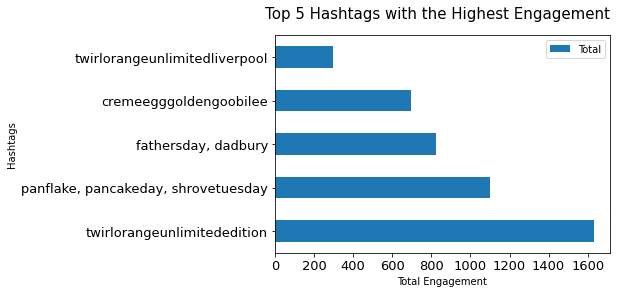

In [ ]:
screen_name = "CadburyUK" 


def Hashtag(): #Extract user top 5 Hashtags
    def get_hashtags(tweet):
        entities = tweet.get('entities', {})
        hashtags = entities.get('hashtags', [])
        return [tag['text'].lower() for tag in hashtags]

    total=0
    fName = "{}.json".format(screen_name)
    tweets = []
    with open(fName, 'r') as f:
        for line in f:
            tweet = json.loads(line)
            if ((get_hashtags(tweet) != []) and (tweet.get('in_reply_to_status_id') is None) and (tweet.get('retweeted_status') is None)):                
                tweets.append([get_hashtags(tweet), (tweet['retweet_count'] + tweet['favorite_count'])])
        #for a in tweets:
        df = pd.DataFrame(tweets, columns = ['Hashtags', 'Total'])
        df['Hashtags'] = df['Hashtags'].astype(str).str.replace('[','')
        df['Hashtags'] = df['Hashtags'].astype(str).str.replace(']','')
        df['Hashtags'] = df['Hashtags'].astype(str).str.replace("'",'')
        df= df.groupby(['Hashtags']).sum().sort_values(by=['Total'], ascending = False)[:6]
        #df = df.reset_index()
        df = df.drop(df.index[[0]])
        #print(df)
        ax = df
        ax = ax.sort_values('Total',ascending=False)[:5].plot(kind='barh' , fontsize=13)
        plt.xticks(rotation=0)
        plt.suptitle("Top 5 Hashtags with the Highest Engagement", fontsize=15)
        plt.ylabel("Hashtags")
        plt.xlabel("Total Engagement")
        plt.show()

        
        a = df.to_numpy()

Hashtag()

### Top 5 Hashtags with the Highest Engagement (Hershey's)

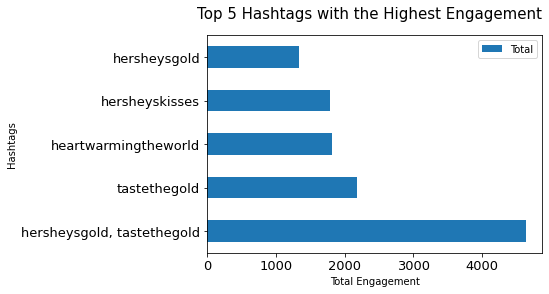

In [ ]:
screen_name = "hersheys" 


def Hashtag(): #Extract user top 5 Hashtags
    def get_hashtags(tweet):
        entities = tweet.get('entities', {})
        hashtags = entities.get('hashtags', [])
        return [tag['text'].lower() for tag in hashtags]

    total=0
    fName = "{}.json".format(screen_name)
    tweets = []
    with open(fName, 'r') as f:
        for line in f:
            tweet = json.loads(line)
            if ((get_hashtags(tweet) != []) and (tweet.get('in_reply_to_status_id') is None) and (tweet.get('retweeted_status') is None)):                
                tweets.append([get_hashtags(tweet), (tweet['retweet_count'] + tweet['favorite_count'])])
        #for a in tweets:
        df = pd.DataFrame(tweets, columns = ['Hashtags', 'Total'])
        df['Hashtags'] = df['Hashtags'].astype(str).str.replace('[','')
        df['Hashtags'] = df['Hashtags'].astype(str).str.replace(']','')
        df['Hashtags'] = df['Hashtags'].astype(str).str.replace("'",'')
        df= df.groupby(['Hashtags']).sum().sort_values(by=['Total'], ascending = False)[:6]
        #df = df.reset_index()
        df = df.drop(df.index[[0]])
        #print(df)
        ax = df
        ax = ax.sort_values('Total',ascending=False)[:5].plot(kind='barh' , fontsize=13)
        plt.xticks(rotation=0)
        plt.suptitle("Top 5 Hashtags with the Highest Engagement", fontsize=15)
        plt.ylabel("Hashtags")
        plt.xlabel("Total Engagement")
        plt.show()

        
        a = df.to_numpy()

Hashtag()

### Top 5 Hashtags with the Highest Engagement (M&M'S)

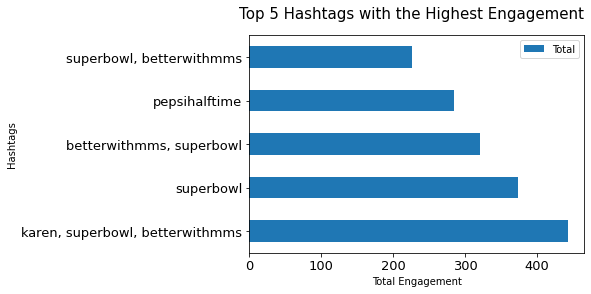

In [ ]:
screen_name = "mmschocolate" 


def Hashtag(): #Extract user top 5 Hashtags
    def get_hashtags(tweet):
        entities = tweet.get('entities', {})
        hashtags = entities.get('hashtags', [])
        return [tag['text'].lower() for tag in hashtags]

    total=0
    fName = "{}.json".format(screen_name)
    tweets = []
    with open(fName, 'r') as f:
        for line in f:
            tweet = json.loads(line)
            if ((get_hashtags(tweet) != []) and (tweet.get('in_reply_to_status_id') is None) and (tweet.get('retweeted_status') is None)):                
                tweets.append([get_hashtags(tweet), (tweet['retweet_count'] + tweet['favorite_count'])])
        #for a in tweets:
        df = pd.DataFrame(tweets, columns = ['Hashtags', 'Total'])
        df['Hashtags'] = df['Hashtags'].astype(str).str.replace('[','')
        df['Hashtags'] = df['Hashtags'].astype(str).str.replace(']','')
        df['Hashtags'] = df['Hashtags'].astype(str).str.replace("'",'')
        df= df.groupby(['Hashtags']).sum().sort_values(by=['Total'], ascending = False)[:6]
        #df = df.reset_index()
        df = df.drop(df.index[[0]])
        #print(df)
        ax = df
        ax = ax.sort_values('Total',ascending=False)[:5].plot(kind='barh' , fontsize=13)
        plt.xticks(rotation=0)
        plt.suptitle("Top 5 Hashtags with the Highest Engagement", fontsize=15)
        plt.ylabel("Hashtags")
        plt.xlabel("Total Engagement")
        plt.show()

        
        a = df.to_numpy()

Hashtag()

### Top 5 Hashtags used by Cadbury

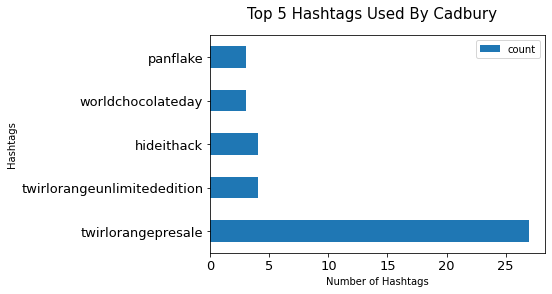

In [ ]:
# find out the popular hashtags used

screen_name = "CadburyUK" 

cadbury_hashtags = df_cadbury['hashtags'].value_counts().reset_index()
cadbury_hashtags = cadbury_hashtags.rename(columns={'index': 'hashtags', 'hashtags': 'count'})
cadbury_hashtags = cadbury_hashtags.drop(cadbury_hashtags.index[[0]])
cadbury_hashtags = cadbury_hashtags.set_index('hashtags')
ax = cadbury_hashtags
ax = ax.sort_values('count',ascending=False)[:5].plot(kind='barh' , fontsize=13)
plt.xticks(rotation=0)
plt.suptitle("Top 5 Hashtags Used By Cadbury", fontsize=15)
plt.ylabel("Hashtags")
plt.xlabel("Number of Hashtags")
plt.show()
#fig = ax.get_figure()
#fig.savefig("images/Top 5 Hashtags Used By Cadbury.png", bbox_inches='tight')



### Top 5 Hashtags used by Hershey's

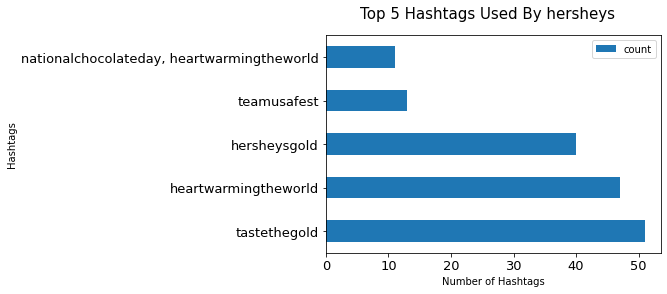

In [ ]:
# find out the popular hashtags used

screen_name = "hersheys" 

hersheys_hashtags = df_hersheys['hashtags'].value_counts().reset_index()
hersheys_hashtags = hersheys_hashtags.rename(columns={'index': 'hashtags', 'hashtags': 'count'})
hersheys_hashtags = hersheys_hashtags.drop(hersheys_hashtags.index[[0]])
hersheys_hashtags = hersheys_hashtags.set_index('hashtags')
ax = hersheys_hashtags
ax = ax.sort_values('count',ascending=False)[:5].plot(kind='barh' , fontsize=13)
plt.xticks(rotation=0)
plt.suptitle("Top 5 Hashtags Used By hersheys", fontsize=15)
plt.ylabel("Hashtags")
plt.xlabel("Number of Hashtags")
plt.show()
#fig = ax.get_figure()
#fig.savefig("images/Top 5 Hashtags Used By hersheys.png", bbox_inches='tight')



### Top 5 Hashtags used by M&M'S

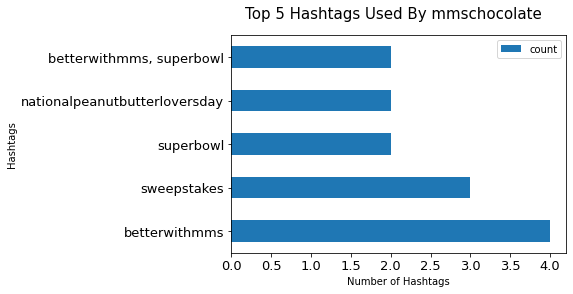

In [ ]:
# find out the popular hashtags used

screen_name = "mmschocolate" 

mmschocolate_hashtags = df_mmschocolate['hashtags'].value_counts().reset_index()
mmschocolate_hashtags = mmschocolate_hashtags.rename(columns={'index': 'hashtags', 'hashtags': 'count'})
mmschocolate_hashtags = mmschocolate_hashtags.drop(mmschocolate_hashtags.index[[0]])
mmschocolate_hashtags = mmschocolate_hashtags.set_index('hashtags')
ax = mmschocolate_hashtags
ax = ax.sort_values('count',ascending=False)[:5].plot(kind='barh' , fontsize=13)
plt.xticks(rotation=0)
plt.suptitle("Top 5 Hashtags Used By mmschocolate", fontsize=15)
plt.ylabel("Hashtags")
plt.xlabel("Number of Hashtags")
plt.show()
#fig = ax.get_figure()
#fig.savefig("images/Top 5 Hashtags Used By mmschocolate.png", bbox_inches='tight')



### Top 5 Mentions with Highest Engagement (Cadbury)

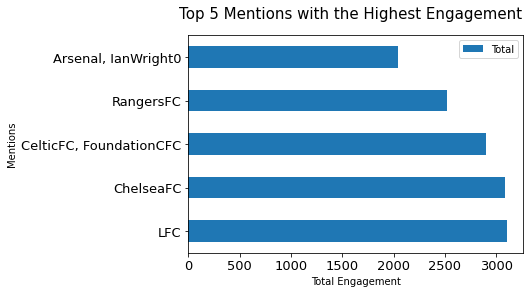

In [ ]:
screen_name = "CadburyUK" 


def Mentions(): #Extract user top 5 mentions
    def get_mentions(tweet):
        entities = tweet.get('entities', {})
        mentions = entities.get('user_mentions', [])
        return [tag['screen_name'] for tag in mentions]

    total=0
    fName = "{}.json".format(screen_name)
    tweets = []
    with open(fName, 'r') as f:
        for line in f:
            tweet = json.loads(line)
            if ((get_mentions(tweet) != []) and (tweet.get('retweeted_status') is None)):                
                tweets.append([tweet['text'], get_mentions(tweet), (tweet['retweet_count'] + tweet['favorite_count'])])

        #for a in tweets:
        df = pd.DataFrame(tweets, columns = ['Text','Mentions', 'Total'])
        del df['Text']
        df['Mentions'] = df['Mentions'].astype(str).str.replace('[','')
        df['Mentions'] = df['Mentions'].astype(str).str.replace(']','')
        df['Mentions'] = df['Mentions'].astype(str).str.replace("'",'')
        df= df.groupby(['Mentions']).sum().sort_values(by=['Total'], ascending = False)[:5]
        #print(df)

        ax = df
        ax = ax.sort_values('Total',ascending=False)[:5].plot(kind='barh' , fontsize=13)
        plt.xticks(rotation=0)
        plt.suptitle("Top 5 Mentions with the Highest Engagement", fontsize=15)
        plt.ylabel("Mentions")
        plt.xlabel("Total Engagement")
        plt.show()

Mentions()

### Top 5 Mentions with Highest Engagement (Hershey's)

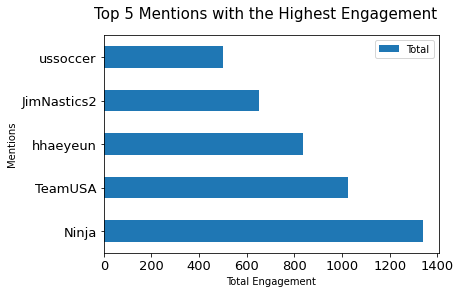

In [ ]:
screen_name = "hersheys" 


def Mentions(): #Extract user top 5 mentions
    def get_mentions(tweet):
        entities = tweet.get('entities', {})
        mentions = entities.get('user_mentions', [])
        return [tag['screen_name'] for tag in mentions]

    total=0
    fName = "{}.json".format(screen_name)
    tweets = []
    with open(fName, 'r') as f:
        for line in f:
            tweet = json.loads(line)
            if ((get_mentions(tweet) != []) and (tweet.get('retweeted_status') is None)):                
                tweets.append([tweet['text'], get_mentions(tweet), (tweet['retweet_count'] + tweet['favorite_count'])])

        #for a in tweets:
        df = pd.DataFrame(tweets, columns = ['Text','Mentions', 'Total'])
        del df['Text']
        df['Mentions'] = df['Mentions'].astype(str).str.replace('[','')
        df['Mentions'] = df['Mentions'].astype(str).str.replace(']','')
        df['Mentions'] = df['Mentions'].astype(str).str.replace("'",'')
        df= df.groupby(['Mentions']).sum().sort_values(by=['Total'], ascending = False)[:5]
        #print(df)

        ax = df
        ax = ax.sort_values('Total',ascending=False)[:5].plot(kind='barh' , fontsize=13)
        plt.xticks(rotation=0)
        plt.suptitle("Top 5 Mentions with the Highest Engagement", fontsize=15)
        plt.ylabel("Mentions")
        plt.xlabel("Total Engagement")
        plt.show()

Mentions()

### Top 5 Mentions with Highest Engagement (M&M'S)

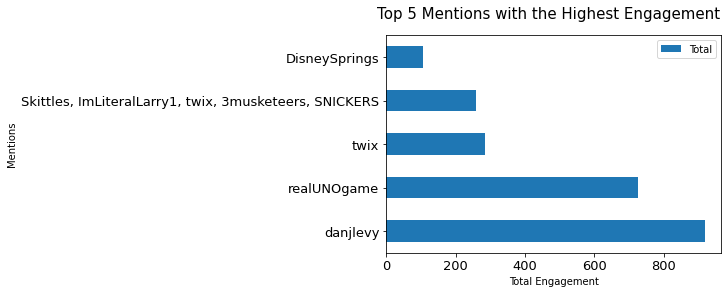

In [ ]:
screen_name = "mmschocolate" 


def Mentions(): #Extract user top 5 mentions
    def get_mentions(tweet):
        entities = tweet.get('entities', {})
        mentions = entities.get('user_mentions', [])
        return [tag['screen_name'] for tag in mentions]

    total=0
    fName = "{}.json".format(screen_name)
    tweets = []
    with open(fName, 'r') as f:
        for line in f:
            tweet = json.loads(line)
            if ((get_mentions(tweet) != []) and (tweet.get('retweeted_status') is None)):                
                tweets.append([tweet['text'], get_mentions(tweet), (tweet['retweet_count'] + tweet['favorite_count'])])

        #for a in tweets:
        df = pd.DataFrame(tweets, columns = ['Text','Mentions', 'Total'])
        del df['Text']
        df['Mentions'] = df['Mentions'].astype(str).str.replace('[','')
        df['Mentions'] = df['Mentions'].astype(str).str.replace(']','')
        df['Mentions'] = df['Mentions'].astype(str).str.replace("'",'')
        df= df.groupby(['Mentions']).sum().sort_values(by=['Total'], ascending = False)[:5]
        #print(df)

        ax = df
        ax = ax.sort_values('Total',ascending=False)[:5].plot(kind='barh' , fontsize=13)
        plt.xticks(rotation=0)
        plt.suptitle("Top 5 Mentions with the Highest Engagement", fontsize=15)
        plt.ylabel("Mentions")
        plt.xlabel("Total Engagement")
        plt.show()

Mentions()

### Average Engagement Rate (Cadbury)

In [20]:
screen_name = "CadburyUK" 


def Avg_Engagement(): #Get the user average engagement for every tweet
    fName = "{}.json".format(screen_name)
    total_Engagement = 0
    total_Tweets = 0
    with open(fName, 'r') as f:
        for line in f:
            tweet = json.loads(line)
            if ((tweet.get('in_reply_to_status_id') is None) and (tweet.get('retweeted_status') is None)): 
                total_Tweets = total_Tweets + 1
                total_Engagement = total_Engagement + (tweet['retweet_count'] + tweet['favorite_count'])
        print("Total Retweet:",total_Engagement)
        print("Total Favorite:",total_Tweets)
        average_Engagement_Cadbury = (total_Engagement/ total_Tweets)
        print("Average Engagement on a tweet:",average_Engagement_Cadbury)

Avg_Engagement()

Total Retweet: 34313
Total Favorite: 117
Average Engagement on a tweet: 293.2735042735043


### Average Engagement Rate (Hershey's)

In [21]:
screen_name = "hersheys" 


def Avg_Engagement(): #Get the user average engagement for every tweet
    fName = "{}.json".format(screen_name)
    total_Engagement = 0
    total_Tweets = 0
    with open(fName, 'r') as f:
        for line in f:
            tweet = json.loads(line)
            if ((tweet.get('in_reply_to_status_id') is None) and (tweet.get('retweeted_status') is None)): 
                total_Tweets = total_Tweets + 1
                total_Engagement = total_Engagement + (tweet['retweet_count'] + tweet['favorite_count'])
        print("Total Retweet:",total_Engagement)
        print("Total Favorite:",total_Tweets)
        average_Engagement_hersheys = (total_Engagement/ total_Tweets)
        print("Average Engagement on a tweet:",average_Engagement_hersheys)

Avg_Engagement()

Total Retweet: 41812
Total Favorite: 409
Average Engagement on a tweet: 102.22982885085574


### Average Engagement Rate (M&M'S)

In [ ]:
screen_name = "mmschocolate" 


def Avg_Engagement(): #Get the user average engagement for every tweet
    fName = "{}.json".format(screen_name)
    total_Engagement = 0
    total_Tweets = 0
    with open(fName, 'r') as f:
        for line in f:
            tweet = json.loads(line)
            if ((tweet.get('in_reply_to_status_id') is None) and (tweet.get('retweeted_status') is None)): 
                total_Tweets = total_Tweets + 1
                total_Engagement = total_Engagement + (tweet['retweet_count'] + tweet['favorite_count'])
        print("Total Retweet:",total_Engagement)
        print("Total Favorite:",total_Tweets)
        average_Engagement_mmschocolate = (total_Engagement/ total_Tweets)
        print("Average Engagement on a tweet:",average_Engagement_mmschocolate)

Avg_Engagement()

Total Retweet: 20929
Total Favorite: 32
Average Engagement on a tweet: 654.03125


### Tweet Activity of Cadbury

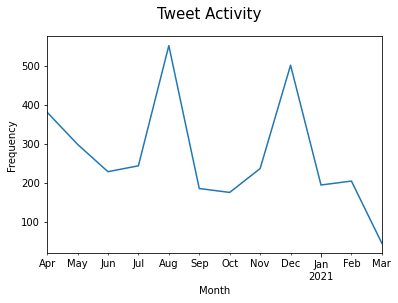

In [ ]:
# time series by day
df_cadbury1 = df_cadbury
df_cadbury1['time'] = pd.to_datetime(df_cadbury1['created_at'])
cadbury_time = df_cadbury1.set_index(['time'])

# create function to count number of tweets 


cadbury_month = cadbury_time.resample('M').size()
ax = cadbury_month.plot()
plt.suptitle("Tweet Activity", fontsize=15)
plt.xlabel("Month")
plt.ylabel("Frequency")
plt.show()
fig = ax.get_figure()

### Tweet Activity of Hershey's

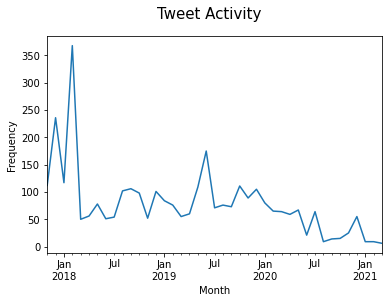

In [ ]:
# time series by day
df_hersheys1 = df_hersheys
df_hersheys1['time'] = pd.to_datetime(df_hersheys1['created_at'])
hersheys_time = df_hersheys1.set_index(['time'])

# create function to count number of tweets 


hersheys_month = hersheys_time.resample('M').size()
ax = hersheys_month.plot()
plt.suptitle("Tweet Activity", fontsize=15)
plt.xlabel("Month")
plt.ylabel("Frequency")
plt.show()
fig = ax.get_figure()

### Tweet Activity of M&M'S

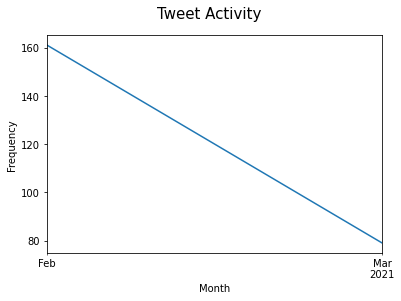

In [ ]:
# time series by day
df_mmschocolate1 = df_mmschocolate
df_mmschocolate1['time'] = pd.to_datetime(df_mmschocolate1['created_at'])
mmschocolate_time = df_mmschocolate1.set_index(['time'])

# create function to count number of tweets 


mmschocolate_month = mmschocolate_time.resample('M').size()
ax = mmschocolate_month.plot()
plt.suptitle("Tweet Activity", fontsize=15)
plt.xlabel("Month")
plt.ylabel("Frequency")
plt.show()
fig = ax.get_figure()